In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
M='/home/s1332488/chapter2/'

In [20]:
df = pd.read_csv(M+'uav_vs_s1_5ha.csv')
df_1ha = pd.read_csv(M+'uav_vs_s1_1ha.csv')
df_radd = pd.read_csv(M+'uav_vs_radd_1ha.csv')
df_peru = pd.read_csv(M+'P_uav_vs_s1_5ha.csv')
df_peruPlots = pd.read_csv(M+'P_plots_5ha.csv')

<AxesSubplot:xlabel='S1', ylabel='uav'>

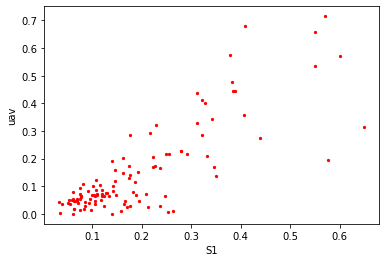

In [24]:
df_peru.plot.scatter(x='S1',y='uav',color='red',marker='.')

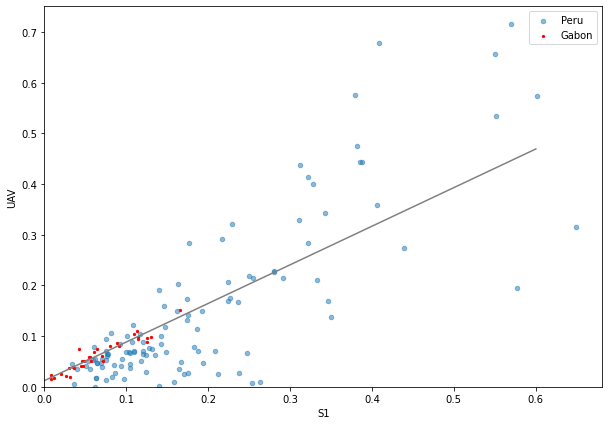

In [28]:
plt.figure(figsize=(10,7))
ax = plt.axes()
df_peru.plot.scatter(x='S1',y='uav',ax=ax,alpha=0.5,label='Peru')
df.plot.scatter(x='S1',y='UAV',ax=ax,color='red',marker='.',label='Gabon')
plt.xlim(0)
plt.ylim(0)
xx = np.linspace(0,0.6)
yy = 0.762*xx + .012
plt.plot(xx,yy,zorder=1,color='grey')
plt.legend()
plt.savefig(M+'peru_and_gabon.png',dpi=300)

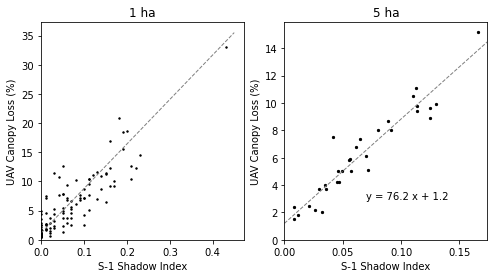

In [144]:
fig = plt.figure(figsize=(8,4))
ax= plt.subplot(1,2,2)
df['uav_pct'] = 100*df.UAV
df_1ha['uav_pct'] = 100*df_1ha.UAV
df.plot.scatter(x='S1',y='uav_pct',marker='o',s=5,color='black',ax=ax)
plt.title('5 ha')
plt.xlim(0)
plt.ylim(0)
#plt.plot([0,0.15],[0,0.15],zorder=1,color='grey',ls='--',label='1:1')
plt.xlabel('S-1 Shadow Index')
plt.ylabel('UAV Canopy Loss (%)')

fit = np.polyfit(df['S1'].values,df.uav_pct,1)

xx = np.linspace(0,0.45)
yy = fit[0]*xx + fit[1]

plt.plot(xx,yy,zorder=1,color='grey',lw=1,label='Linear Fit',ls='--')
#plt.legend()

eq = 'y = '+str(round(fit[0],1))+' x + '+str(round(fit[1],1))
plt.text(0.07,3,eq,size=10)

ax= plt.subplot(1,2,1)
df_1ha.plot.scatter(x='S1',y='uav_pct',s=2,color='black',ax=ax)
plt.plot(xx,yy,zorder=1,color='grey',lw=1,label='Linear Fit',ls='--')
plt.title('1 ha')
plt.xlim(-0.001)
plt.ylim(0)
plt.xlabel('S-1 Shadow Index')
plt.ylabel('UAV Canopy Loss (%)')
plt.savefig(M+'model_fit_to_ivindo_5ha.png',dpi=300)

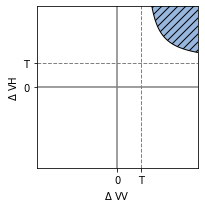

In [143]:
c=0.6
plt.figure(figsize=(3,3))

plt.axvline(x=c,color='grey',lw=1,ls='--')
plt.axhline(y=c,color='grey',lw=1,ls='--')
plt.axvline(x=0,color='grey')
plt.axhline(y=0,color='grey')
x = np.linspace(0.601,4,500)
plt.fill_between(x,c**2/(x-c)+c,4,hatch='///',edgecolor='black',facecolor='#97b7de')
plt.ylim(-2,2)
plt.xlim(-2,2)
ax = plt.gca()
ax.set_aspect('equal')
plt.xlabel('$\Delta$ VV')
plt.ylabel('$\Delta$ VH')
plt.yticks([0,c],['0','T'])
plt.xticks([0,c],['0','T'])
plt.tight_layout()
plt.savefig(M+'threshold_illustration.png',dpi=300)

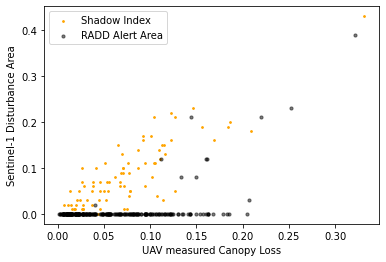

In [35]:
ax = plt.axes()
df_1ha.plot.scatter(x='UAV',y='S1',ax=ax,s=12,color='orange',marker='.',label='Shadow Index')
df_radd.plot.scatter(x='uav',y='radd',s=10,ax=ax,color='black',alpha=0.5,label='RADD Alert Area')
plt.legend()
plt.xlabel('UAV measured Canopy Loss')
plt.ylabel('Sentinel-1 Disturbance Area')
plt.savefig(M+'shadow_vs_RADD_1ha.png',dpi=300)

In [49]:
dates = pd.read_csv(M+'radd_dates.csv')
in_uav = dates[dates.day < 21030]
out_uav = dates[dates.day > 21030]

print('Inside: ',in_uav['count'].sum())
print('Outside: ',out_uav['count'].sum())

Inside:  78.0
Outside:  127.0


In [50]:
100*(127/(127+78))

61.951219512195124